# Prototype V1

**Author: Xiaochi (George) Li**


In [1]:
import tensorflow as tf
print(tf.__version__)

1.10.0


In [2]:
import numpy as np
from tqdm import tqdm

In [3]:
label2expression = {1: "Surprise",2: "Fear",3: "Disgust",4: "Happiness",
                    5: "Sadness", 6: "Anger",7: "Neutral"}

In [4]:
# create image label pair as a dictionary
label_file = "../RAFDB/list_patition_label.txt"
train_img_label_pair = {}
test_img_label_pair ={}
with open(label_file) as all_label:
    for label in all_label:
        label = label.rstrip()
        if label.startswith("train"):
            train_img_label_pair[label.split(" ")[0][:-4]+"_aligned.jpg"] = int(label.split(" ")[1])
        if label.startswith("test"):
            test_img_label_pair[label.split(" ")[0][:-4]+"_aligned.jpg"] = int(label.split(" ")[1])


Surprise
(100, 100, 3)


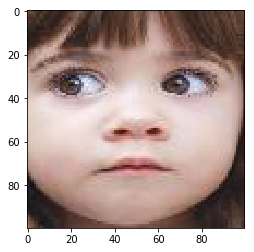

In [6]:
# Visualizr 
# https://stackoverflow.com/questions/50753668/how-do-i-set-up-a-image-dataset-in-tensorflow-for-a-cnn
import numpy as np
from PIL import Image
import os.path

folder = "../RAFDB/aligned/"
image_name = "test_0002_aligned.jpg"
full_name = folder + image_name
print(label2expression[test_img_label_pair[image_name]])
img = Image.open(full_name).convert('RGB')
img = np.array(img)
print(img.shape)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
plt.show()

In [7]:
import numpy as np
from PIL import Image
def load_to_numpy(img_label_pair):
    length = 100
    width = 100
    limit = len(img_label_pair)
    labels = np.zeros((limit, 7))
    imgs = np.empty((limit, length, width, 3))
    print("Loading Data:")
    with tqdm(total=limit) as pbar:
        i = 0
        for image_name in img_label_pair:
            img = Image.open(folder + image_name).convert('RGB')
            img = np.array(img).reshape((100,100,3))
            # imgs = np.append(imgs, img, axis=0) 
            imgs[i] = img # faster approach! learning algorithm is useful
            #labels[i] = img_label_pair[image_name]
            labels[i, img_label_pair[image_name]-1] = 1
            i+=1
            pbar.update(1)
    one_hot_label = np.zeros(())
    return (imgs, labels)

In [8]:
train_img, train_label = load_to_numpy(train_img_label_pair)
test_img, test_label = load_to_numpy(test_img_label_pair)

Loading Data:


100%|███████████████████████████████████| 12271/12271 [00:15<00:00, 769.07it/s]


Loading Data:


100%|█████████████████████████████████████| 3068/3068 [00:04<00:00, 695.49it/s]


In [9]:
train_label.shape

(12271, 7)

In [10]:
# https://www.tensorflow.org/guide/datasets#consuming_numpy_arrays

# Assume that each row of `features` corresponds to the same row as `labels`.
assert train_img.shape[0] == train_label.shape[0]

train_img_placeholder = tf.placeholder(train_img.dtype, train_img.shape)
train_label_placeholder = tf.placeholder(train_label.dtype, train_label.shape)

train_dataset = tf.data.Dataset.from_tensor_slices((train_img_placeholder, train_label_placeholder))

iterator = train_dataset.make_initializable_iterator()
with tf.Session() as sess:
    sess.run(iterator.initializer, feed_dict={train_img_placeholder: train_img,
                                          train_label_placeholder: train_label})

In [11]:
train_dataset

<TensorSliceDataset shapes: ((100, 100, 3), (7,)), types: (tf.float64, tf.float64)>

In [12]:
# Keras model
from tensorflow.keras import layers
print(tf.keras.__version__)

model = tf.keras.Sequential([
    layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(100,100,3)),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(7, activation = 'softmax')
])

model.compile(optimizer=tf.train.AdadeltaOptimizer(0.001), 
              loss='categorical_crossentropy',
             metrics=[tf.keras.metrics.categorical_accuracy])

model.fit(train_img, train_label, epochs=10,batch_size=100)

2.1.6-tf
Epoch 1/10
  300/12271 [..............................] - ETA: 15:01 - loss: 12.4818 - categorical_accuracy: 0.17 - ETA: 14:14 - loss: 12.8118 - categorical_accuracy: 0.16 - ETA: 13:46 - loss: 12.6045 - categorical_accuracy: 0.1867

KeyboardInterrupt: 